<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/advanced-analytics/MNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de dígitos com MNIST e Pytorch

MNIST, é um famoso conjunto de dados contendo 70.000 dígitos escritos à mão em tons de cinza (0-9) e seus valores associados. No PyTorch,  torchvision.dataset nos dá acesso a alguns conjuntos de dados, incluindo este. O conjunto de dados é dividido em 60.000 imagens de treinamento e 10.000 para o conjunto de teste.
Nosso objetivo é construir um classificador de rede neural que possa ler os dígitos na imagem.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

#hyperparameter:
batch_size = 100

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

classes = ('0','1','2','3','4','5','6','7','8','9')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



    1     7     8     8     8     9     8     6


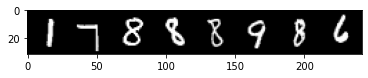

In [ ]:
# This code will plot some examples
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:8]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
# hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
learning_rate = 0.1
#creating model
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.6158
Epoch [1/5], Step [200/600], Loss: 0.3408
Epoch [1/5], Step [300/600], Loss: 0.3989
Epoch [1/5], Step [400/600], Loss: 0.2474
Epoch [1/5], Step [500/600], Loss: 0.2661
Epoch [1/5], Step [600/600], Loss: 0.3085
Epoch [2/5], Step [100/600], Loss: 0.2567
Epoch [2/5], Step [200/600], Loss: 0.1943
Epoch [2/5], Step [300/600], Loss: 0.2262
Epoch [2/5], Step [400/600], Loss: 0.1535
Epoch [2/5], Step [500/600], Loss: 0.4008
Epoch [2/5], Step [600/600], Loss: 0.3727
Epoch [3/5], Step [100/600], Loss: 0.1884
Epoch [3/5], Step [200/600], Loss: 0.1720
Epoch [3/5], Step [300/600], Loss: 0.2300
Epoch [3/5], Step [400/600], Loss: 0.1830
Epoch [3/5], Step [500/600], Loss: 0.2065
Epoch [3/5], Step [600/600], Loss: 0.2072
Epoch [4/5], Step [100/600], Loss: 0.1985
Epoch [4/5], Step [200/600], Loss: 0.1573
Epoch [4/5], Step [300/600], Loss: 0.2416
Epoch [4/5], Step [400/600], Loss: 0.0898
Epoch [4/5], Step [500/600], Loss: 0.1862
Epoch [4/5], Step [600/600], Loss:

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 96.0 %


#Exercício 1: Melhorando o classificador MNIST

Neste exercício queremos melhorar o desempenho do nosso classificador e aplicar algumas das técnicas para melhorar a performance.

Você deve seguir cada um dos pontos a seguir e comentar as melhorias ou problemas causados pelas alterações. Depois de concluir as etapas, você deve explicar qual configuração funciona melhor. Nesta parte, você pode aplicar suas próprias modificações e ficar à vontade para procurar sugestões on-line.

Crie uma rede mais profunda, teste o desempenho usando 2 e 4 camadas.
Altere o método de otimização para torch.optim.Adam. Teste-o com o modelo de uma camada interna e com várias. Você provavelmente precisará diminuir seu learning rate, observe como isso é relevante quando o número de camadas é maior.
Adicione camadas de dropout e observe como isso afeta o desempenho.

#Exercício 2: Cães vs Gatos

Baixe o conjunto de dados em http://files.fast.ai/data/dogscats.zip, existem 25.000 fotos anotadas de cães e gatos disponíveis para treinamento e 12.500 no conjunto de teste que você deve tentar classificar. Desta vez, você precisará descobrir uma maneira de ler e transformar as imagens em tensores.

Treine um classificador com este conjunto de dados. Crie sua versão de uma CNN.
Tente melhorar seu resultado adicionando regularização (dropout por exemplo).

Em caso de dúvidas consulte: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py